## Obtain the train and test data

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/uci-har dataset/UCI HAR Dataset/train/train.csv')
test = pd.read_csv('/content/drive/MyDrive/uci-har dataset/UCI HAR Dataset/test/test.csv')
print(train.shape, test.shape)



(7352, 564) (2947, 564)


In [ ]:
train.head(3)

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING


In [ ]:
# get X_train and y_train from csv files
X_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train.ActivityName

In [ ]:
# get X_test and y_test from test csv file
X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test.ActivityName

In [ ]:
print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((7352, 561),(7352,))
X_test  and y_test  : ((2947, 561),(2947,))


# Let's model with our data

### Labels that are useful in plotting confusion matrix

In [ ]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

### Function to plot the confusion matrix

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Generic function to run any model specified

In [ ]:
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results
    
    

### Method to print the gridsearch Attributes

In [ ]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

    
    

# 1. Logistic Regression with Grid Search

In [ ]:
from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
18 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver l

Done 
 

training_time(HH:MM:SS.ms) - 0:00:26.920398


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.014657


---------------------
|      Accuracy      |
---------------------

    0.9579233118425518


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 429  59   0   0   3]
 [  0  16 516   0   0   0]
 [  0   0   0 493   2   1]
 [  0   0   0   4 403  13]
 [  0   0   0  25   1 445]]


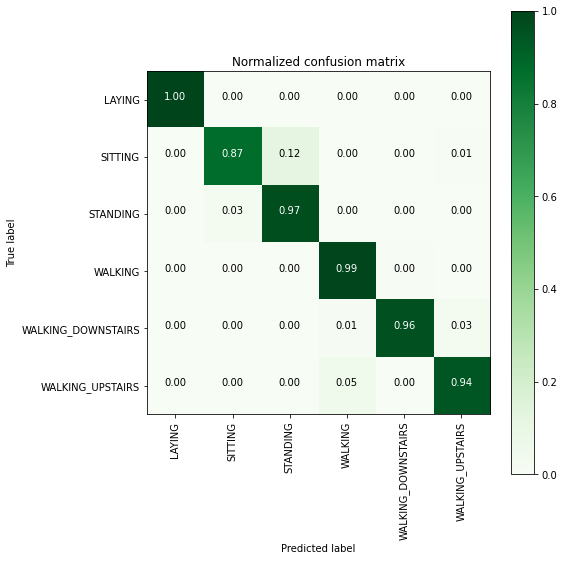

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.96      0.87      0.92       491
          STANDING       0.90      0.97      0.93       532
           WALKING       0.94      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.96      0.98       420
  WALKING_UPSTAIRS       0.96      0.94      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [ ]:

# start Grid search
#parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
#log_reg = linear_model.LogisticRegression()
#log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
#log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)


<ipython-input-14-2319d7a836df>:2: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


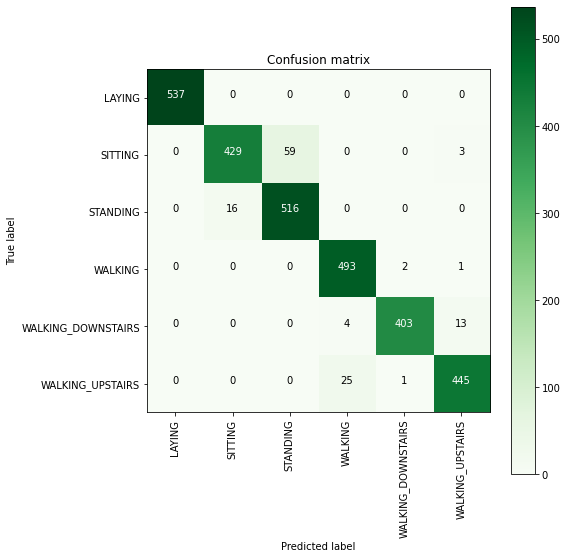

In [ ]:
#plt.figure(figsize=(8,8))
#plt.grid(b=False)
#plot_confusion_matrix(log_reg_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
#plt.show()

In [ ]:
# observe the attributes of the model 
#print_grid_search_attributes(log_reg_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=1)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 1, 'penalty': 'l2'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9378415584920218



#  2. Linear SVC with GridSearch

In [ ]:
#from sklearn.svm import LinearSVC

training the model..
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
<ipython-input-10-2ccf1944bc83>:51: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


Done 
 

training_time(HH:MM:SS.ms) - 0:01:37.830317


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.023043


---------------------
|      Accuracy      |
---------------------

    0.9674244994910078


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  2 433  53   0   0   3]
 [  0  12 519   1   0   0]
 [  0   0   0 496   0   0]
 [  0   0   0   3 412   5]
 [  0   0   0  17   0 454]]


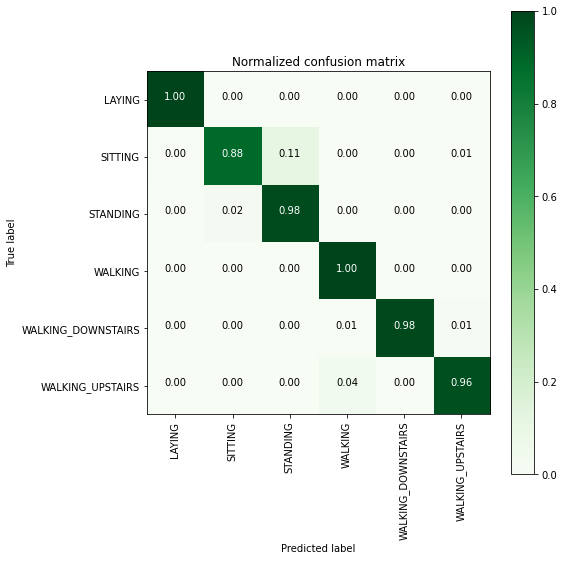

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.88      0.93       491
          STANDING       0.91      0.98      0.94       532
           WALKING       0.96      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.96      0.97       471

          accuracy                           0.97      2947
         macro avg       0.97      0.97      0.97      2947
      weighted avg       0.97      0.97      0.97      2947



In [ ]:
#parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
#lr_svc = LinearSVC(tol=0.00005)
#lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
#lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [ ]:
#print_grid_search_attributes(lr_svc_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LinearSVC(C=0.5, tol=5e-05)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 0.5}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9419282546465222



[link text](https://)# 3.  Kernel SVM with GridSearch

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:06:41.728751


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:03.613993


---------------------
|      Accuracy      |
---------------------

    0.9626739056667798


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 441  48   0   0   2]
 [  0  12 520   0   0   0]
 [  0   0   0 489   2   5]
 [  0   0   0   4 397  19]
 [  0   0   0  17   1 453]]


<ipython-input-10-2ccf1944bc83>:51: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


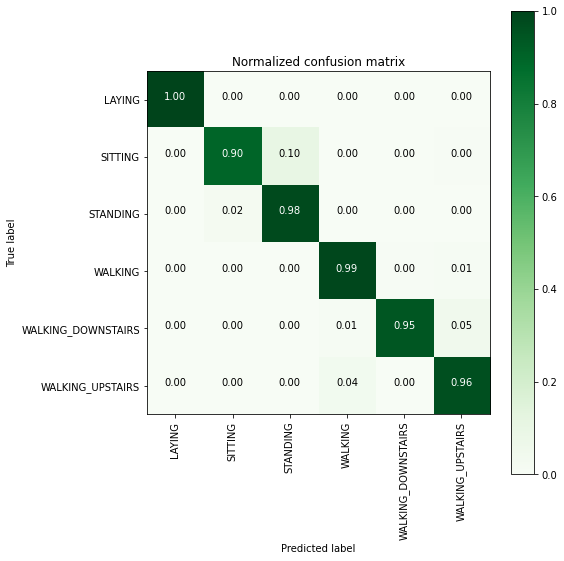

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.90      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.95      0.96      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [ ]:
from sklearn.svm import SVC
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [ ]:
print_grid_search_attributes(rbf_svm_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	SVC(C=16, gamma=0.0078125)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 16, 'gamma': 0.0078125}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9447834551903698



# 4. Decision Trees with GridSearchCV

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:36.675412


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.009091


---------------------
|      Accuracy      |
---------------------

    0.8747879199185612


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 372 119   0   0   0]
 [  0  59 473   0   0   0]
 [  0   0   0 472  17   7]
 [  0   0   0  21 351  48]
 [  0   0   0  70  28 373]]


<ipython-input-10-2ccf1944bc83>:51: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


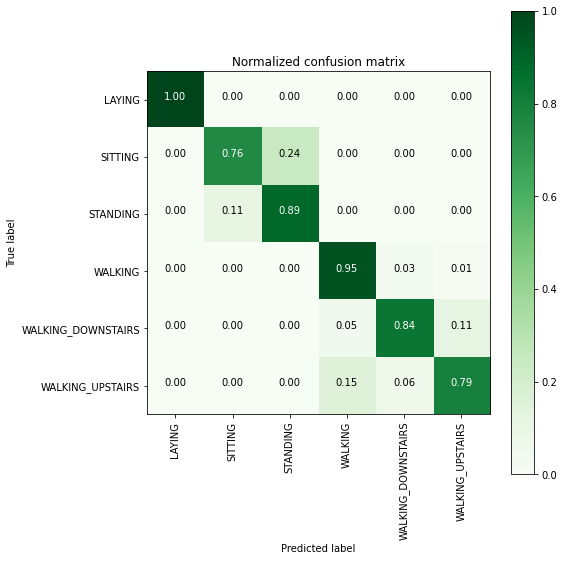

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.86      0.76      0.81       491
          STANDING       0.80      0.89      0.84       532
           WALKING       0.84      0.95      0.89       496
WALKING_DOWNSTAIRS       0.89      0.84      0.86       420
  WALKING_UPSTAIRS       0.87      0.79      0.83       471

          accuracy                           0.87      2947
         macro avg       0.88      0.87      0.87      2947
      weighted avg       0.88      0.87      0.87      2947

--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(max_depth=9)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'max_depth': 9}

---------------------------------
|   No of CrossValidation sets

In [ ]:
#from sklearn.tree import DecisionTreeClassifier
#parameters = {'max_depth':np.arange(3,10,2)}
#dt = DecisionTreeClassifier()
#dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
#dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
#print_grid_search_attributes(dt_grid_results['model'])

# 5. Random Forest Classifier with GridSearch

In [ ]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(rfc_grid_results['model'])

training the model..


KeyboardInterrupt: ignored

# 6.  Gradient Boosted Decision Trees With GridSearch

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {'max_depth': np.arange(5,8,1), \
             'n_estimators':np.arange(130,170,10)}
gbdt = GradientBoostingClassifier()
gbdt_grid = GridSearchCV(gbdt, param_grid=param_grid, n_jobs=-1)
gbdt_grid_results = perform_model(gbdt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(gbdt_grid_results['model'])


# 7. Comparing all models

In [ ]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('Linear SVC          : {:.04}%       {:.04}% '.format(lr_svc_grid_results['accuracy'] * 100,\
                                                        100-(lr_svc_grid_results['accuracy'] * 100)))

print('rbf SVM classifier  : {:.04}%      {:.04}% '.format(rbf_svm_grid_results['accuracy'] * 100,\
                                                          100-(rbf_svm_grid_results['accuracy'] * 100)))

print('DecisionTree        : {:.04}%      {:.04}% '.format(dt_grid_results['accuracy'] * 100,\
                                                        100-(dt_grid_results['accuracy'] * 100)))

print('Random Forest       : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                           100-(rfc_grid_results['accuracy'] * 100)))
print('GradientBoosting DT : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                        100-(rfc_grid_results['accuracy'] * 100)))

In [ ]:
!pip install tensorflow-model-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 KB 11.8 MB/s eta 0:00:00


In [ ]:
# Encode the target variable using LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Convert the encoded target variable to a one-hot encoded array
y_train_onehot = keras.utils.to_categorical(y_train_encoded, num_classes=6)
y_test_onehot = keras.utils.to_categorical(y_test_encoded, num_classes=6)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow_model_optimization.sparsity import keras as sparsity
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Flatten
from keras.layers import Conv3D,Conv2D,Conv1D,MaxPooling1D, MaxPooling2D,TimeDistributed,LSTM,ConvLSTM2D, GRU
from keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from keras.layers import TimeDistributed
import seaborn as sns
from keras.utils import to_categorical

# one-hot encode y_train
y_train_encoded = to_categorical(y_train, num_classes=6)

# one-hot encode y_test
y_test_encoded = to_categorical(y_test, num_classes=6)

# Create the model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001, decay=1e-6), metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_encoded, batch_size=32, epochs=50, validation_data=(X_test, y_test_encoded), shuffle=True)

# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter._experimental_lower_tensor_list_ops = False
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
tflite_model = converter.convert()

# Save the model to disk
open("model.tflite", "wb").write(tflite_model)

import os
basic_model_size = os.path.getsize("model.tflite")
print("Model is %d bytes" % basic_model_size)


ValueError: ignored

In [ ]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter._experimental_lower_tensor_list_ops = False
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
tflite_model = converter.convert()

# Save the model to disk
open("model.tflite", "wb").write(tflite_model)

import os
basic_model_size = os.path.getsize("model.tflite")
print("Model is %d bytes" % basic_model_size)

NameError: ignored

In [ ]:
# Compile the TensorFlow Lite model into a C source file
!xxd -i model.tflite > model.cc

# Create a header file from the C source file
!sed 's/unsigned/const unsigned/g' model.cc > model.h

import os
model_h_size = os.path.getsize("model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")

In [ ]:
import tensorflow_model_optimization as tfmot

pruning_schedule = tfmot.sparsity.keras.PolynomialDecay(
    initial_sparsity=0.0,
    final_sparsity=0.5,
    begin_step=0,
    end_step=1000
)

pruned_model = tfmot.sparsity.keras.prune_low_magnitude(model, pruning_schedule=pruning_schedule)
pruned_model.summary()

import tempfile

logdir = tempfile.mkdtemp()

callbacks = [
    sparsity.UpdatePruningStep(),
    sparsity.PruningSummaries(log_dir=logdir, profile_batch=0),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',min_lr=0.0001)

]
pruned_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
his = pruned_model.fit(X_train, y_train_encoded, epochs = 20, batch_size=32, callbacks=callbacks, validation_data= (X_test, y_test_encoded), verbose=1)


score = pruned_model.evaluate(X_test, y_test_encoded, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


In [ ]:
# Compute end step to finish pruning after 450 epochs.
epochs = 20
end_step = np.ceil(1.0 * X_train.shape[1] / 20).astype(np.int32) * epochs
print(end_step)

# Define model for pruning by starting the model with 50% sparsity (50% zeros in weights) and end with 80% sparsity.
pruning_params = {
      'pruning_schedule': sparsity.PolynomialDecay(initial_sparsity=0.65,
                                                   final_sparsity=0.90,
                                                   begin_step=0,
                                                   end_step=end_step,
                                                   frequency=100)
}

# `prune_low_magnitude` requires a recompile
model_for_pruning = sparsity.prune_low_magnitude(model, **pruning_params)
model_for_pruning.summary()
adam = tf.keras.optimizers.Adam(
       learning_rate=0.0001,
       name="adam")
model_for_pruning.compile(
    loss=["mse"],
    optimizer= "adam",
    metrics=['accuracy'])

In [ ]:
import tempfile

logdir = tempfile.mkdtemp()

callbacks = [
    sparsity.UpdatePruningStep(),
    sparsity.PruningSummaries(log_dir=logdir, profile_batch=0),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',min_lr=0.0001)

]
his = model_for_pruning.fit(X_train, y_train_encoded, epochs = 20, batch_size=32, callbacks=callbacks, validation_data= (X_test, y_test_encoded), verbose=1)


score = model_for_pruning.evaluate(X_test, y_test_encoded, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
score = model_for_pruning.evaluate(X_test, y_test_encoded, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
pruned_model = sparsity.strip_pruning(pruned_model)
pruned_model.summary()

In [ ]:
pruned_model.compile(
    loss=["mse"],
    optimizer="adam",
    metrics=['accuracy']
)


In [ ]:
predictions_p = pruned_model.predict(X_test)
cm = tf.math.confusion_matrix(labels=tf.argmax(y_test_encoded, 1), predictions=tf.argmax(predictions_p, 1))
axis_labels = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
figure = plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True,cmap=plt.cm.Blues,xticklabels=axis_labels, yticklabels=axis_labels)
plt.tight_layout()
plt.ylim(len(cm)-0, 0)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np

for i, w in enumerate(pruned_model.get_weights()):
    print(
        "{} -- Total:{}, Zeros: {:.2f}%".format(
            pruned_model.weights[i].name, w.size, np.sum(w == 0) / w.size * 100
        )
    )

In [ ]:
# Convert pruned model to TFLite model
converter = tf.lite.TFLiteConverter.from_keras_model(pruned_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
converter.experimental_lower_tensor_list_ops = False
tflite_pruned_model = converter.convert()

# Save the TFLite model to disk
with open('pruned_model.tflite', 'wb') as f:
    f.write(tflite_pruned_model)

# Print size of TFLite model
pruned_model_size = os.path.getsize("pruned_model.tflite")
print("Pruned model size: %d bytes" % pruned_model_size)


In [ ]:
# Compile the TensorFlow Lite model into a C source file
!xxd -i pruned_model.tflite > Pmodel.cc

# Create a header file from the C source file
!sed 's/unsigned/const unsigned/g' Pmodel.cc > Pmodel.h

import os
model_h_size = os.path.getsize("Pmodel.h")
print(f"Header file, Pmodel.h, is {model_h_size:,} bytes.")


In [ ]:
pruned_model.save('pruned_model.h5')

In [ ]:
# Define a function to generate representative data for quantization
def representative_data_gen():
  for input_value in np.array(X_train, dtype=np.float32):
    yield [input_value]

# Convert the Keras model to a TensorFlow Lite model with quantization
pruned_model = tf.keras.models.load_model('pruned_model.h5')

converter = tf.lite.TFLiteConverter.from_keras_model(pruned_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_data_gen
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
converter._experimental_lower_tensor_list_ops = False
pruned_quantized_tflite_model = converter.convert()

# Save the quantized model to disk
with open("models/pruned_quantized_model.tflite", "wb") as f:
    f.write(pruned_quantized_tflite_model)

# Check the size of the quantized model
quantized_model_size = os.path.getsize("models/pruned_quantized_model.tflite")
print("pruned_quantized_model is %d bytes" % quantized_model_size)

> We can choose ___Logistic regression___ or ___Linear SVC___ or ___rbf SVM___.

# Conclusion :

In the real world, domain-knowledge, EDA and feature-engineering matter most.